# Linear Regression - House Price Prediction

**Objective**: To predict  the house price

 

**Outline**:

1. **Constructing the Model**

    - 1.1 Gradient Descent (GD)
    - 1.2 Ordinary Least Square (OLS)
    - 1.3 Comparison between GD and OLS
    
2. **Data Preprocessing**

    - 2.1 Descriptive Statistics
    - 2.2 Remove Outliers
    - 2.3 Correlation Matrix
    - 2.4 Encoding
    - 2.5 Feature Scaling and Data Splitting

3. **Model Evaluation**

Dataset from https://www.kaggle.com/datasets/snehasishdhar/simple-house-price-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

SEED = 42 # set the random seed to 42 for reproducibility

## 1. Constructing the Model

### 1.1 Gradient Descent (GD)

**Model Outline**:
  1. **\_\_init\_\_** -> for initializing the hyperparameters
  2. **fit** -> to fit X_train and y_train into the model to train
  3. **predict** -> 1. return the predicted values for gd ; 2. to predict X_test
  4. **_add_bias_term** -> to add the bias term x_0 column vector (full of ones)
  5. **_initialize** -> to initialize and convert the data structure of the X_train and y_train if necessary
  6. **_gradient_descent** -> updating the parameters theta

In [2]:
class GDLinearRegression:

  # public:
  def __init__(self, alpha_learning_rate, iterations): 


    """
    Two hyperparmemters in gradient descent:
      1. alpha_learning_rate -> control the "step size" for optimization
      2. iterations -> control the "number of steps"

    """


    self.alpha_learning_rate = alpha_learning_rate
    self.iterations = iterations

    self.trained = False

  def fit(self, X, y):


    """
    fit/ train the model:
    1. initialize the feature matrix X and target vector y
    2. perform _ times gradient descent set in "iterations" hyperparameter
    3. return the estimated/ trained parameters theta

    """


    self._initialize(X, y)

    for _ in range(self.iterations):
      self._gradient_descent()

    self.trained = True
    return self.theta
  
  def predict(self, X):


    """
    Two scenarios:
      1. X_train is passed -> just return the hypothesis function (h) for y_pred to update theta
      2. X_test is passed -> add bias term to X_test, then return h

    """


    if self.trained:
      X = self._add_bias_term(X)

    h = np.dot(X, self.theta)
    return h

  # private:
  def _add_bias_term(self, X):
    # x_0 is the column vector with all ones (bias term)
    x_0_bias_term = np.ones(X.shape[0]).reshape((-1, 1))  

    return np.hstack((X, x_0_bias_term)) 

  def _initialize(self, X, y):
    self.m_samples, self.n_features = X.shape

    # add theta_0 for the bias term (intercept)
    self.theta = np.zeros(self.n_features + 1).reshape((self.n_features + 1, 1)) 

    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
      self.X = X.to_numpy()
    self.X = self._add_bias_term(X) 

    if isinstance(y, pd.Series):
      self.y = y.to_numpy()
    self.y = y.reshape((-1, 1))

  def _gradient_descent(self):
    # gradient of the cost function J
    h = self.predict(self.X)
    d_J_gradient = (np.dot(self.X.T, (h - self.y))) * (1/ self.m_samples)

    # update parameter
    self.theta = self.theta - (self.alpha_learning_rate * d_J_gradient)


### 1.2 Ordinary Least Squares (OLS)

**Model Outline**:
  1. **\_\_init\_\_** -> to check if the model has been trained or not
  2. **fit** -> to fit X_train and y_train into the model to train
  3. **predict** -> to predict X_test using the theta trained with normal equation
  4. **_add_bias_term** -> to add the bias term x_0 column vector (full of ones)
  5. **_initialize** -> to initialize and convert the data structure of the X_train and y_train if necessary

In [3]:
class OLSLinearRegression:
  
  # public:
  def __init__(self):
    self.trained = False

  def fit(self, X, y):


    """
    Unlike gd, ols doesn't have hyperparameters:
    1. initialize X and y
    2. substitute X and y into the normal equation
    3. return theta
    
    """


    self._initialize(X, y)

    self.theta = np.dot(np.linalg.inv(np.dot(self.X.T, self.X)), np.dot(self.X.T, y)) # normal equation

    self.trained = True
    return self.theta
  
  def predict(self, X):
    if self.trained:
      X = self._add_bias_term(X)

    h = np.dot(X, self.theta)
    return h

  # private:
  def _add_bias_term(self, X):
    x_0_bias_term = np.ones(X.shape[0]).reshape((-1, 1))   
    return np.hstack((X, x_0_bias_term)) 

  def _initialize(self, X, y):
    self.m_samples, self.n_features = X.shape

    self.theta = np.zeros(self.n_features + 1).reshape((self.n_features + 1, 1))

    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
      X = X.to_numpy()
    self.X = self._add_bias_term(X) 

    if isinstance(y, pd.Series):
      y = y.to_numpy()
    self.y = y.reshape((-1, 1))

### 1.3 Comparison between GD and OLS

In [4]:
# 1. prepare testing dataset
np.random.seed(42)
X = np.linspace(1, 25, 50)
y = 2 * X + 3 + np.random.normal(0, 5, 50)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)


# 2. data splitting (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


# 3. training
rate, iters = 0.001, 10; new_rate, new_iters = 0.001, 7000

gd_lr = GDLinearRegression(rate, iters); new_gd_lr = GDLinearRegression(new_rate,new_iters)
ols_lr = OLSLinearRegression()

gd_lr.fit(X_train, y_train); new_gd_lr.fit(X_train, y_train)
ols_lr.fit(X_train, y_train);


# 4. deployment
x_lim = np.linspace(0,30,50).reshape(-1,1)

gd_y = gd_lr.predict(x_lim); new_gd_y = new_gd_lr.predict(x_lim)
ols_y = ols_lr.predict(x_lim)

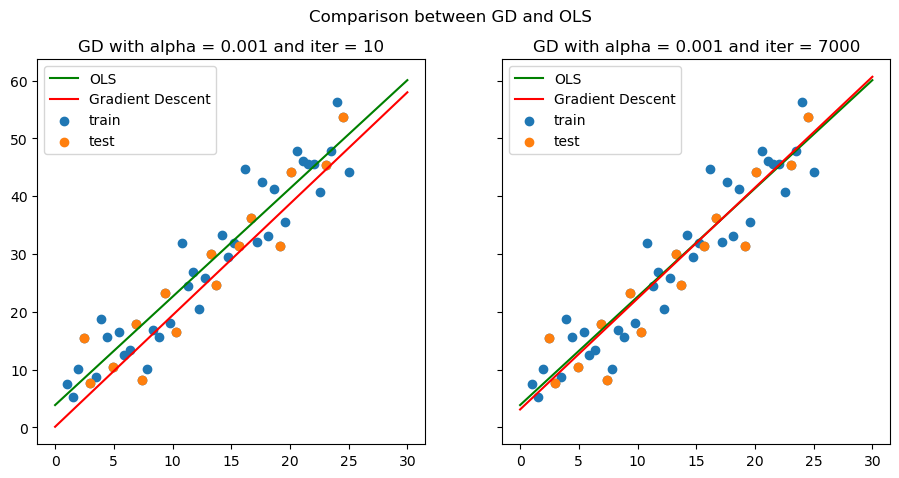

In [5]:
# 5. visualization
fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharex=True, sharey=True)

axs[0].plot(x_lim, ols_y, color='green', label='OLS')
axs[0].plot(x_lim, gd_y, color='red', label="Gradient Descent")
axs[0].scatter(X,y, color="tab:blue", label="train")
axs[0].scatter(X_test,y_test, color="tab:orange", label="test")

axs[0].set_title(f"GD with alpha = {rate} and iter = {iters}")
axs[0].legend();

axs[1].plot(x_lim, ols_y, color='green', label='OLS')
axs[1].plot(x_lim, new_gd_y, color='red', label="Gradient Descent")
axs[1].scatter(X,y, color="tab:blue", label="train")
axs[1].scatter(X_test,y_test, color="tab:orange", label="test")

axs[1].set_title(f"GD with alpha = {new_rate} and iter = {new_iters}")
axs[1].legend();

fig.suptitle("Comparison between GD and OLS");

Since OLS is a analytical solution which directly computes the global minimum, it is the optimum solution under the assumptions made in maximum likelihood estimation (MLE), e.g. idependent and identical distribution (IID) of error terms. 

Therefore, for iterative solution like GD, the more iterations, the solution/ regression line is closer to OLS. 

## 2. Data Preprocessing

### 2.1 Desriptive Statistics 

In [6]:
df = pd.read_csv("price_data.csv")
df.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    47 non-null     int64
 1   rooms   47 non-null     int64
 2   price   47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [8]:
df.describe()

,area,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### 2.2 Remove Outliers

We use IQR to remove the outliers because linear regression is very sensitive to outliers.

In [9]:
original_len = len(df)

for col in ['price', 'area']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

new_len = len(df)

print(f"{original_len - new_len} samples have been removed, remaining {new_len} samples.")

4 samples have been removed, remaining 43 samples.


### 2.3 Correlation Matrix

To visualize the correlation between the features and target with a correlation matrix. Too low implies that the feature has a low predictive power, but too high may also lead to the multicollinearity problem.

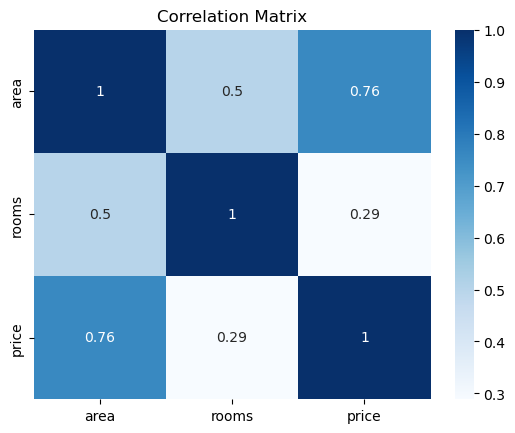

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix");

Shown in this matrix, all of them have moderate correlation, so no further preprocessing is needed.

### 2.4 Encoding

Since we will treat number of rooms as categorical variables, we use one-hot encoding to convert them into binary.

In [11]:
df = pd.get_dummies(df, columns=['rooms'])
df.head()

,area,price,rooms_1,rooms_2,rooms_3,rooms_4
0,2104,399900,0,0,1,0
1,1600,329900,0,0,1,0
2,2400,369000,0,0,1,0
3,1416,232000,0,1,0,0
4,3000,539900,0,0,0,1


In [12]:
X = df[['area', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4']]
y = df['price']
print(X.shape, y.shape)

(43, 5) (43,)


### 2.5. Feature Scaling and Data Splitting

Since the values of area and price are vastly different (1,000 vs 100,000), we need to do feature scaling to prevent numerical instability and improve convergence efficiency in gd. 

In [13]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.to_numpy().reshape((-1,1)))

To split the dataset into training and testing sets.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

print(X_train.shape, y_train.shape)

(30, 5) (30, 1)


## 3. Model Evaluation

A simple performance comparison between my model (GD) and sklearn's model using the R-squared metrics.

In [15]:
model = GDLinearRegression(0.1, 10000) # initialize
model.fit(X_train, y_train) # train
y_pred = model.predict(X_test) # predict

my_model_score = r2_score(y_test, y_pred)
print(f"The r2 score of my model is {my_model_score}")

The r2 score of my model is 0.6033725399701585


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # initialize
model.fit(X_train, y_train) # train
y_pred = model.predict(X_test) # predict

sklearn_model_score = r2_score(y_test, y_pred)
print(f"The r2 score of sklearn's model is {sklearn_model_score}")

The r2 score of sklearn's model is 0.6033725399701794


Convert the data back into original scale and check the difference between true (y_test) and predicted values (y_pred).

In [17]:
rev_y_pred = scaler.inverse_transform(y_pred).ravel().astype(int).tolist()
rev_y_test = scaler.inverse_transform(y_test).ravel().astype(int).tolist()

lst = list(zip(rev_y_pred, rev_y_test))
for i in range(len(lst)):
  print(f"True Value: {lst[i][0]}; Predicted Value: {lst[i][1]}; Difference: {abs(lst[i][0] - lst[i][1])} \n")

True Value: 373540; Predicted Value: 329900; Difference: 43640 

True Value: 412020; Predicted Value: 469000; Difference: 56980 

True Value: 368463; Predicted Value: 475000; Difference: 106537 

True Value: 286441; Predicted Value: 368500; Difference: 82059 

True Value: 326100; Predicted Value: 345000; Difference: 18900 

True Value: 234854; Predicted Value: 299000; Difference: 64146 

True Value: 442072; Predicted Value: 539900; Difference: 97828 

True Value: 327044; Predicted Value: 329999; Difference: 2955 

True Value: 258904; Predicted Value: 212000; Difference: 46904 

True Value: 253306; Predicted Value: 232000; Difference: 21306 

True Value: 279480; Predicted Value: 314900; Difference: 35420 

True Value: 309822; Predicted Value: 349900; Difference: 40078 

True Value: 283211; Predicted Value: 285900; Difference: 2689 

